In [284]:
%matplotlib inline

In [285]:
from pathlib import Path
from pandas import DataFrame,Series
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import scipy.stats as stats
import pylab as pl
from random import sample

In [286]:
#Description of features
#Average[3]: Average acceleration (for each axis)
#Standard Deviation[3]: Standard deviation (for each axis)
#Average Absolute Difference[3]: Average absolute
#difference between the value of each of the 200 readings
#within the ED and the mean value over those 200 values
#(for each axis)
#Average Resultant Acceleration[1]: Average of the square
#roots of the sum of the values of each axis squared
#over the ED
#Time Between Peaks[3]: Time in milliseconds between
#peaks in the sinusoidal waves associated with most
#activities (for each axis)
#Binned Distribution[30]: We determine the range of values
#for each axis (maximum – minimum), divide this range into
#10 equal sized bins, and then record what fraction of the
#200 values fell within each of the bins. 

In [287]:
my_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile.csv")
df = pd.read_csv(my_file)
df.head()
df.shape#(no of rows, no of columns)

(417, 46)

In [288]:
df['color'] = Series([(0 if x == "walking" else 1) for x in df['Label']])
my_color_map = ListedColormap(['r','g'],'mycolormap')
#0,red,walking
#1,green,running

df_unique = df.drop_duplicates(subset=['User', 'Timestamp'])
df_unique.head()
df_unique.shape

(406, 47)

In [289]:
X_train = df_unique.values[:,2:45]

In [290]:
Y_train = df_unique.values[:,45]

In [291]:
test_file = Path("/Users/bharu/CS690-PROJECTS/ActivityAnalyzer/activity_analyzer/DecisionTreeClassifier/FeaturesCsvFile/featuresfile_10.csv")
df_test = pd.read_csv(test_file)
df_test.head()
df_test.shape#(no of rows, no of columns)

(518, 46)

In [292]:
df_test['color'] = Series([(0 if x == "walking" else 1) for x in df_test['Label']])
#0,red,walking
#1,green,running

In [293]:
df_unique_test = df_test.drop_duplicates(subset=['User', 'Timestamp'])
df_unique_test.head()
df_unique_test.shape

(415, 47)

In [294]:
X_test = df_unique_test.values[:,2:45]

In [295]:
Y_test = df_unique_test.values[:,45]

In [296]:
df_gini = DecisionTreeClassifier(criterion = 'gini')

In [297]:
df_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [298]:
feature_imp = df_gini.feature_importances_
feature_imp

array([ 0.        ,  0.        ,  0.0198219 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.03028083,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00802372,  0.11739899,  0.00988926,  0.77710611,
        0.        ,  0.00998256,  0.00979727,  0.        ,  0.        ,
        0.        ,  0.01769937,  0.        ])

In [299]:
#Predicting using test data
Y_predict_gini = df_gini.predict(X_test)

In [300]:
#Calculating accuracy score
score = accuracy_score(Y_test,Y_predict_gini)
score

0.70843373493975903

In [301]:
cm = confusion_matrix(Y_test,Y_predict_gini)
cm

array([[169,  20],
       [101, 125]])

In [302]:
#Predicting using test data
#taking size of test data 10% of training data
test_small = df_unique_test.iloc[sample(range(len(df_unique_test)), 40), :]
X_test_small = test_small.values[:,2:45]
Y_test_small = test_small.values[:,45]
Y_predict_gini_small = df_gini.predict(X_test_small)

In [303]:
#Calculating accuracy score
score_small = accuracy_score(Y_test_small,Y_predict_gini_small)
score_small

0.625

In [304]:
cm_small = confusion_matrix(Y_test_small,Y_predict_gini_small)
cm_small

array([[10,  3],
       [12, 15]])

In [305]:
main_features = []
for i in range(0,len(feature_imp)):
    if feature_imp[i] > 0:
        entry = []
        entry.append(df.columns.values[i+2])
        entry.append(feature_imp[i])
        main_features.append(entry)
main_features

[['Bin3,x', 0.019821900507519204],
 ['Bin10,x', 0.030280831919711874],
 ['TimeDiffPeaks-y', 0.0080237154150197606],
 ['TimeDiffPeaks-z', 0.1173989852329813],
 ['AvgAbsDiff-x', 0.0098892618142206977],
 ['AvgAbsDiff-y', 0.77710610745347142],
 ['AvgAcc-x', 0.0099825567369964639],
 ['AvgAcc-y', 0.0097972686810651813],
 ['StdDev-z', 0.017699372239014181]]

In [306]:
frame = df_unique.loc[:,['AvgAbsDiff-y','AvgAbsDiff-x']]

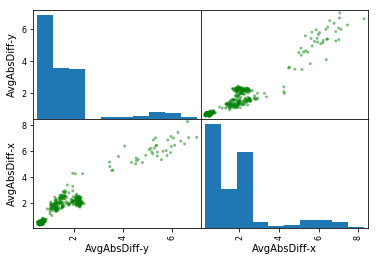

In [307]:
scatter_matrix(frame,color='g')
plt.savefig('./Data-Visualization/images/scatter_matrix_AvgAbsDiffxy_dt_train_3.png',dpi=1000)

In [308]:
frame_test = df_unique_test.loc[:,['AvgAbsDiff-y','AvgAbsDiff-x']]

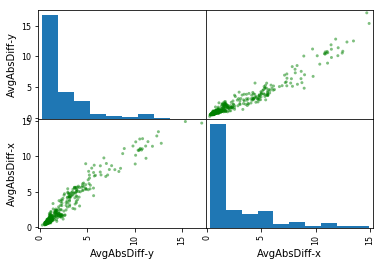

In [309]:
scatter_matrix(frame_test,color='g')
plt.savefig('./Data-Visualization/images/scatter_matrix_AvgAbsDiffxy_dt_val_10.png',dpi=1000)

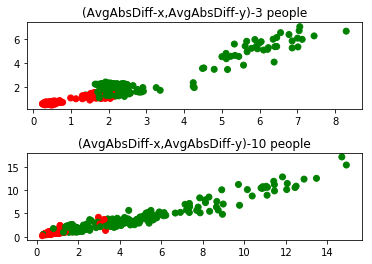

In [310]:
#walking and running data points for training set(3 people data)
plt.subplot(2,1,1)
plt.scatter(df_unique['AvgAbsDiff-x'],df_unique['AvgAbsDiff-y'],c = df_unique['color'], cmap=my_color_map
            ,marker='o',facecolors='none',edgecolors=None)
plt.title("(AvgAbsDiff-x,AvgAbsDiff-y)-3 people")

#walking and running data points for test set(10 people data)
plt.subplot(2,1,2)
plt.scatter(df_unique_test['AvgAbsDiff-x'],df_unique_test['AvgAbsDiff-y'],c = df_unique_test['color'], cmap=my_color_map
            ,marker='o',facecolors='none',edgecolors=None)
plt.title("(AvgAbsDiff-x,AvgAbsDiff-y)-10 people")
plt.subplots_adjust(hspace=0.5)
plt.show()
plt.savefig('./Data-Visualization/images/scatter_AvgAbsDiffxy_dt_train_3_val_10.png',dpi=1000)

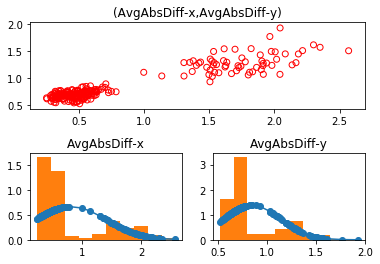

In [311]:
#walking points
walk_points = df_unique.loc[df_unique['Label'] == 'walking']
plt.subplot(2,2,(1,2))
plt.scatter(walk_points['AvgAbsDiff-x'],walk_points['AvgAbsDiff-y'],color = 'r'
            ,marker='o',facecolors='none',edgecolors=None)
plt.title("(AvgAbsDiff-x,AvgAbsDiff-y)")

#distribution of walking points using AvgAbsDiff-x
walk_points_AvgAbsDiffx = np.array(walk_points['AvgAbsDiff-x'])
sorted_values_AvgAbsDiffx = sorted(walk_points_AvgAbsDiffx)
fit = stats.norm.pdf(sorted_values_AvgAbsDiffx, np.mean(sorted_values_AvgAbsDiffx), np.std(sorted_values_AvgAbsDiffx))
plt.subplot(2,2,3)
plt.plot(sorted_values_AvgAbsDiffx,fit,'-o')
plt.hist(sorted_values_AvgAbsDiffx,normed=True)
plt.title("AvgAbsDiff-x")

#distribution of walking points using AvgAbsDiff-y
walk_points_AvgAbsDiffy = np.array(walk_points['AvgAbsDiff-y'])
sorted_values_AvgAbsDiffy = sorted(walk_points_AvgAbsDiffy)
fit = stats.norm.pdf(sorted_values_AvgAbsDiffy, np.mean(sorted_values_AvgAbsDiffy), np.std(sorted_values_AvgAbsDiffy))
plt.subplot(2,2,4)
plt.plot(sorted_values_AvgAbsDiffy,fit,'-o')
plt.hist(sorted_values_AvgAbsDiffy,normed=True)
plt.subplots_adjust(hspace=.5)
plt.title("AvgAbsDiff-y")
plt.show() 
plt.savefig('./Data-Visualization/images/walk_AvgAbsDiffxy_dt.png',dpi=1000)

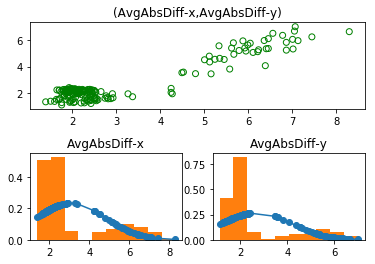

In [312]:
#running points
run_points = df_unique.loc[df_unique['Label'] == 'running']
plt.subplot(2,2,(1,2))
plt.scatter(run_points['AvgAbsDiff-x'],run_points['AvgAbsDiff-y'],color='g'
            ,marker='o',facecolors='none',edgecolors=None)
plt.title("(AvgAbsDiff-x,AvgAbsDiff-y)")

#distribution of running points using AvgAbsDiff-x
run_points_AvgAbsDiffx = np.array(run_points['AvgAbsDiff-x'])
sorted_values_run_AvgAbsDiffx = sorted(run_points_AvgAbsDiffx)
fit = stats.norm.pdf(sorted_values_run_AvgAbsDiffx, np.mean(sorted_values_run_AvgAbsDiffx), np.std(sorted_values_run_AvgAbsDiffx))
plt.subplot(2,2,3)
plt.plot(sorted_values_run_AvgAbsDiffx,fit,'-o')
plt.hist(sorted_values_run_AvgAbsDiffx,normed=True)
plt.title("AvgAbsDiff-x")

#distribution of running points using AvgAbsDiff-y
run_points_AvgAbsDiffy = np.array(run_points['AvgAbsDiff-y'])
sorted_values_run_AvgAbsDiffy = sorted(run_points_AvgAbsDiffy)
fit = stats.norm.pdf(sorted_values_run_AvgAbsDiffy, np.mean(sorted_values_run_AvgAbsDiffy), np.std(sorted_values_run_AvgAbsDiffy))
plt.subplot(2,2,4)
plt.plot(sorted_values_run_AvgAbsDiffy,fit,'-o')
plt.hist(sorted_values_run_AvgAbsDiffy,normed=True)
plt.title("AvgAbsDiff-y")
plt.subplots_adjust(hspace=.5)
plt.show() 
plt.savefig('./Data-Visualization/images/run_AvgAbsDiffxy_dt.png',dpi=1000)